# Anomaly Detection

<br />

There are 3 kinds of anomaly detections of time series data including outlier detection, abnormalities detection and change point detection.


On this sprint, I am going to implement KNN to do outlier detections.

## [Task 1] Research

    - Anomaly detection by KNN evaluates whether unknown data are regular or anomalous under a situation that there is a set of regular data of dimentional vectors.
    
    - If unknown data are far from the set of regilar data, it is possible that the unknown data are anomalous, and vice versa.
    
    - It is necessary to transform time series data to a set of vectors by taking any window width.

## [Task 2] Outlier Detection by KNN

<br />

I am going to do outlier detections for prices data of Bitcoin by KNN.

<br />

"仮想通貨(暗号通貨)４本値CSVゲッター from Cryptowatch"


http://nipper.work/btc/index.php?market=bitFlyer&coin=BTCJPY&periods=86400&after=1420070400

In [1]:
from statistics import mean, variance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

In [2]:
# Read the data

data = pd.read_csv("btc.csv", encoding="shift-jis", header=None)

In [4]:
# Check

data.head()

,0,1,2,3,4,5
0,2016-12-30 00:00:00,0.00769,0.00875,0.00769,0.00845,7870.4500
1,2016-12-31 00:00:00,0.00850,0.00891,0.00842,0.00843,3269.1045
2,2017-01-01 00:00:00,0.00856,0.00864,0.00826,0.00833,3206.9350
3,2017-01-02 00:00:00,0.00838,0.00892,0.00811,0.00821,5814.5170
4,2017-01-03 00:00:00,0.00821,0.00854,0.00800,0.00850,690.7145


In [5]:
data.shape

(366, 6)

- Explanations of the columns


    - 0: Date and time
    
    - 1: Opening price
    
    - 2: Highest price
    
    - 3: Lowest price
    
    - 4: Closing price
    
    - 5: Volume

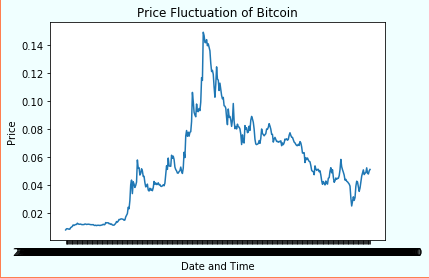

In [6]:
# Visualize the data

plt.figure(facecolor="azure", edgecolor="coral", linewidth=2)

plt.plot(data.iloc[:, 0], data.iloc[:, 1])

plt.title("Price Fluctuation of Bitcoin")
plt.xlabel('Date and Time')
plt.ylabel('Price')
plt.show()

In [8]:
# Implement KNN for time series data


def knn(data, wide, k):
    """
    data: dataframe

    wide: Width of a window

    k: Hyperparameter
    """

    anormaly_score = []

    # Let 110 data a train dataset, and let the rest a test dataset
    train = data.iloc[:183, 1]
    test = data.iloc[184:, 1]

    # Split the datasets into windows whose width is "wide"
    train_window = embed(train, wide)
    test_window = embed(test, wide)

    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(train_window)
    d = neigh.kneighbors(test_window)

    anormaly_score = d[0]

    return anormaly_score


def embed(lst, dim):
    emb = np.empty((0, dim), float)
    for i in range(lst.size - dim + 1):
        tmp = np.array(lst[i:i+dim])[::-1].reshape((1, -1))
        emb = np.append(emb, tmp, axis=0)
    return emb

In [9]:
# Validate the definitions

anormaly_score = knn(data, 15, 1)

In [10]:
# Check

anormaly_score

array([[0.06174525],
       [0.06319904],
       [0.05664549],
       [0.04938809],
       [0.0508881 ],
       [0.05223992],
       [0.04586066],
       [0.04501503],
       [0.0439332 ],
       [0.04297865],
       [0.04243431],
       [0.04468529],
       [0.04359473],
       [0.05206372],
       [0.05665158],
       [0.05849752],
       [0.06213734],
       [0.06189602],
       [0.05935762],
       [0.0592179 ],
       [0.05626867],
       [0.05121603],
       [0.05093961],
       [0.04700643],
       [0.04579688],
       [0.04303894],
       [0.03896508],
       [0.03547963],
       [0.03241037],
       [0.03387488],
       [0.043763  ],
       [0.04873273],
       [0.05347249],
       [0.05895557],
       [0.06257023],
       [0.06740372],
       [0.0700792 ],
       [0.06884366],
       [0.06894765],
       [0.06689785],
       [0.06204057],
       [0.05675915],
       [0.05248377],
       [0.04594437],
       [0.04643016],
       [0.04599825],
       [0.043094  ],
       [0.040

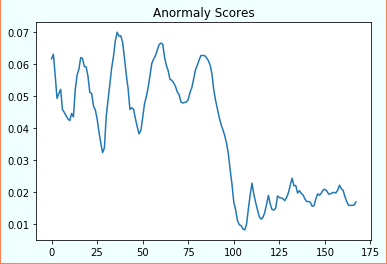

In [11]:
# Plot the results

plt.figure(facecolor="azure", edgecolor="coral", linewidth=2)

plt.plot(anormaly_score)

plt.title("Anormaly Scores")
plt.show()